In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Malgun Gothic')

In [2]:
def getData():
    df2008 = pd.read_csv("C:/농수산가격데이터/1001배추/2008010120081231.csv")
    df2009 = pd.read_csv("C:/농수산가격데이터/1001배추/2009010120091231.csv")
    df2010 = pd.read_csv("C:/농수산가격데이터/1001배추/2010010120101231.csv")
    df2011 = pd.read_csv("C:/농수산가격데이터/1001배추/2011010120111231.csv")
    df2012 = pd.read_csv("C:/농수산가격데이터/1001배추/2012010120121231.csv")
    df2013 = pd.read_csv("C:/농수산가격데이터/1001배추/2013010120131231.csv")
    df2014 = pd.read_csv("C:/농수산가격데이터/1001배추/2014010120141231.csv")
    df2015 = pd.read_csv("C:/농수산가격데이터/1001배추/2015010120151231.csv")
    df2016 = pd.read_csv("C:/농수산가격데이터/1001배추/2016010120161231.csv")
    df2017 = pd.read_csv("C:/농수산가격데이터/1001배추/2017010120171231.csv")
    df2018 = pd.read_csv("C:/농수산가격데이터/1001배추/2018010120181231.csv")
    return pd.concat((df2008, df2009, df2010, df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018), axis=0)

In [3]:
def pricTransform(df):
    #Kg당 가격(kgperprice)
    df['kgperprice'] = ''
    #총거래가격(totalprice) = 거래량(delngQy) * 가격(sbidpric)
    df['totalprice'] = ''
    #총량(totalweight) = 거래단량(delngprut) * 거래량(delngQy) * 단위
    df['totalweight'] = ''

    df11 = df[(df['stdunitnewcode']==11)]
    df12 = df[(df['stdunitnewcode']==12)]
    df13 = df[(df['stdunitnewcode']==13)]
    for df11 in [df11]:
        df11['kgperprice'] = df11['sbidpric'] / df11['delngprut'] * 1000
        df11['totalweight'] = df11['delngprut'] * df11['delngqy'] / 1000
    for df12 in [df12]:
        df12['kgperprice'] = df12['sbidpric'] / df12['delngprut']
        df12['totalweight'] = df12['delngprut'] * df12['delngqy']
    for df13 in [df13]:
        df13['kgperprice'] = df13['sbidpric'] / df13['delngprut'] / 1000
        df13['totalweight'] = df13['delngprut'] * df13['delngqy'] / 1000
    df = pd.concat([df11, df12, df13])

    for df in [df]:
        df['totalprice'] = df['sbidpric'] * df['delngqy']
        
    return df

In [4]:
df = getData()

C:\Users\PC\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3214: DtypeWarning: Columns (16,26) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
C:\Users\PC\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3214: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
C:\Users\PC\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3214: DtypeWarning: Columns (16,21,26) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
C:\Users\PC\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3214: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(cod

In [5]:
df = pricTransform(df)

C:\Users\PC\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\PC\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\PC\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [6]:
# 2만 이상은 결측치라 판단 제거
df = df[(df['kgperprice'] <= 20000)]
# 100이하 제거
df = df[(df['kgperprice'] >= 100)]
# 무게가 0인 것 제거
df = df[(df['totalweight'] >= 0)]

df['yyyy'] = df['delngde'].map(lambda x: str(x)[0:4])
df['mm'] = df['delngde'].map(lambda x: str(x)[4:6])
df['dd'] = df['delngde'].map(lambda x: str(x)[6:8])

In [7]:
def search(code) :
    df_2008 = df[(df['stdspciesnewcode'] == code) & (df['yyyy']== '2008')]
    df_2009 = df[(df['stdspciesnewcode'] == code) & (df['yyyy']== '2009')]
    df_2010 = df[(df['stdspciesnewcode'] == code) & (df['yyyy']== '2010')]
    df_2011 = df[(df['stdspciesnewcode'] == code) & (df['yyyy']== '2011')]
    df_2012 = df[(df['stdspciesnewcode'] == code) & (df['yyyy']== '2012')]
    df_2013 = df[(df['stdspciesnewcode'] == code) & (df['yyyy']== '2013')]
    df_2014 = df[(df['stdspciesnewcode'] == code) & (df['yyyy']== '2014')]
    df_2015 = df[(df['stdspciesnewcode'] == code) & (df['yyyy']== '2015')]
    df_2016 = df[(df['stdspciesnewcode'] == code) & (df['yyyy']== '2016')]
    df_2017 = df[(df['stdspciesnewcode'] == code) & (df['yyyy']== '2017')]
    df_2018 = df[(df['stdspciesnewcode'] == code) & (df['yyyy']== '2018')]
    f, ax = plt.subplots(figsize=(20, 20))
    plt.subplot(341)
    plt.plot(df_2008.index, df_2008['totalweight'],'.')

    plt.subplot(342)
    plt.plot(df_2009.index, df_2009['totalweight'],'.')

    plt.subplot(343)
    plt.plot(df_2010.index, df_2010['totalweight'],'.')

    plt.subplot(344)
    plt.plot(df_2011.index, df_2011['totalweight'],'.')

    plt.subplot(345)
    plt.plot(df_2012.index, df_2012['totalweight'],'.')

    plt.subplot(346)
    plt.plot(df_2013.index, df_2013['totalweight'],'.')
   
    plt.subplot(347)
    plt.plot(df_2014.index, df_2014['totalweight'],'.')
  
    plt.subplot(348)
    plt.plot(df_2015.index, df_2015['totalweight'],'.')
    
    plt.subplot(349)
    plt.plot(df_2016.index, df_2016['totalweight'],'.')
    
    plt.subplot(3,4,10)
    plt.plot(df_2017.index, df_2017['totalweight'],'.')
    
    plt.subplot(3,4, 11)
    plt.plot(df_2018.index, df_2018['totalweight'],'.')
    
    plt.show()

    return 

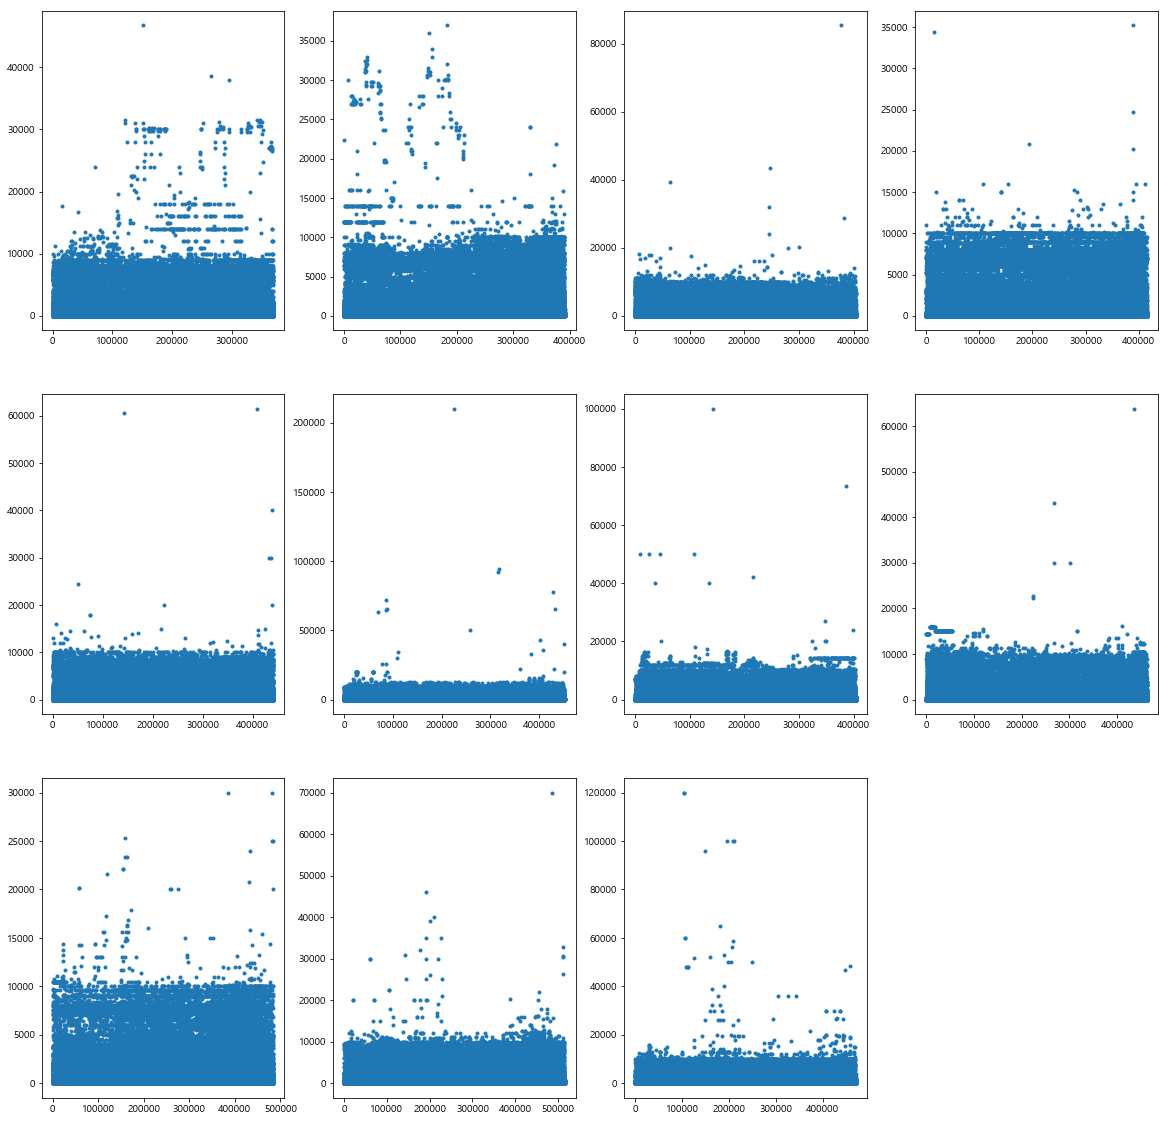

In [8]:
# 기타
search(100199)

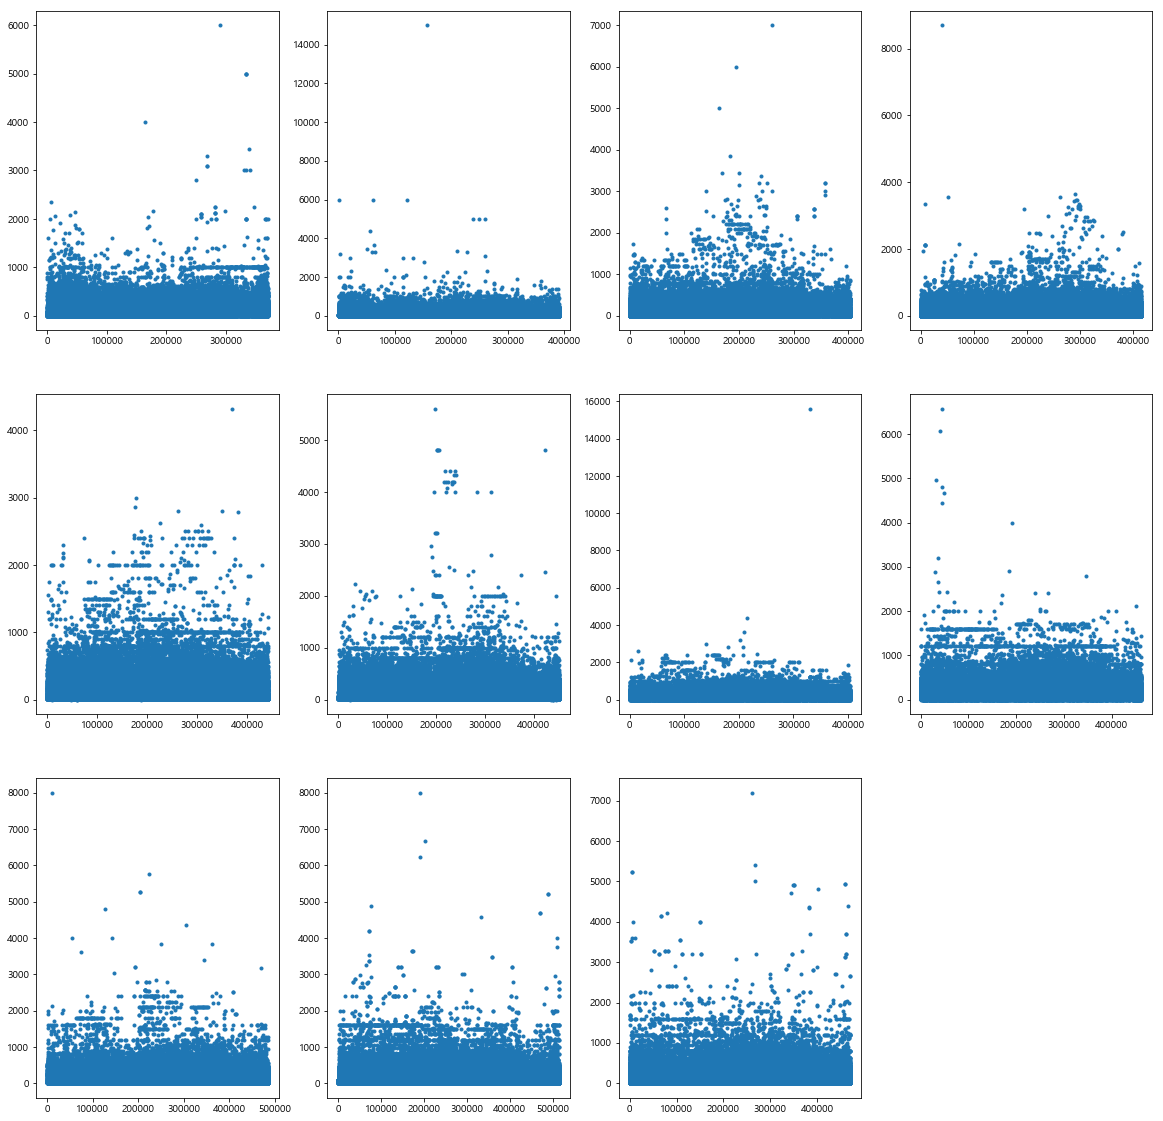

In [9]:
# 100108 쌈(알배기)배추
search(100108)

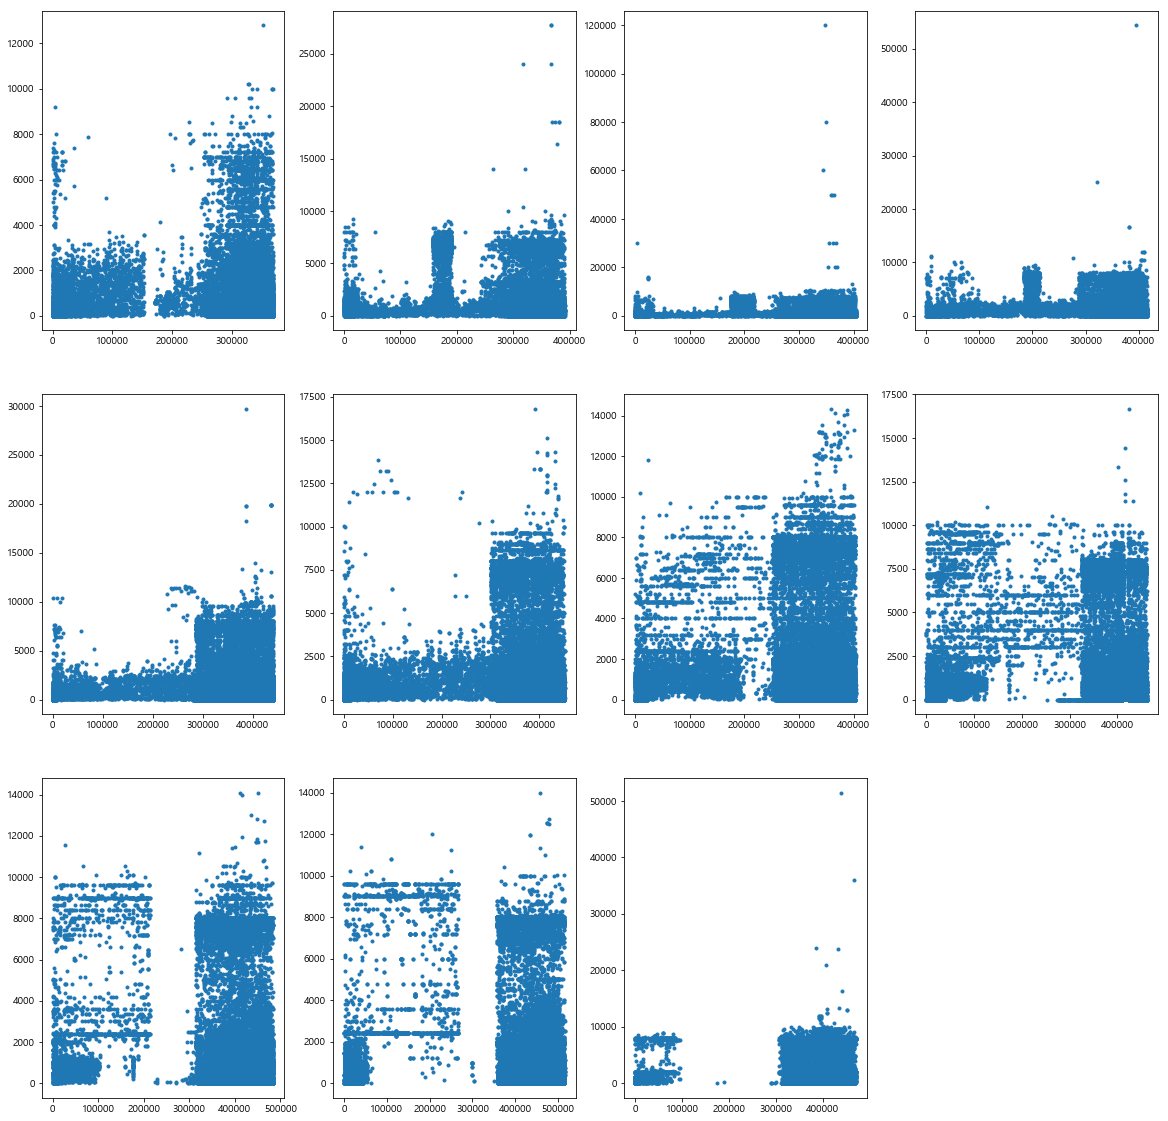

In [10]:
# 100103 김장(가을)배추
search(100103)

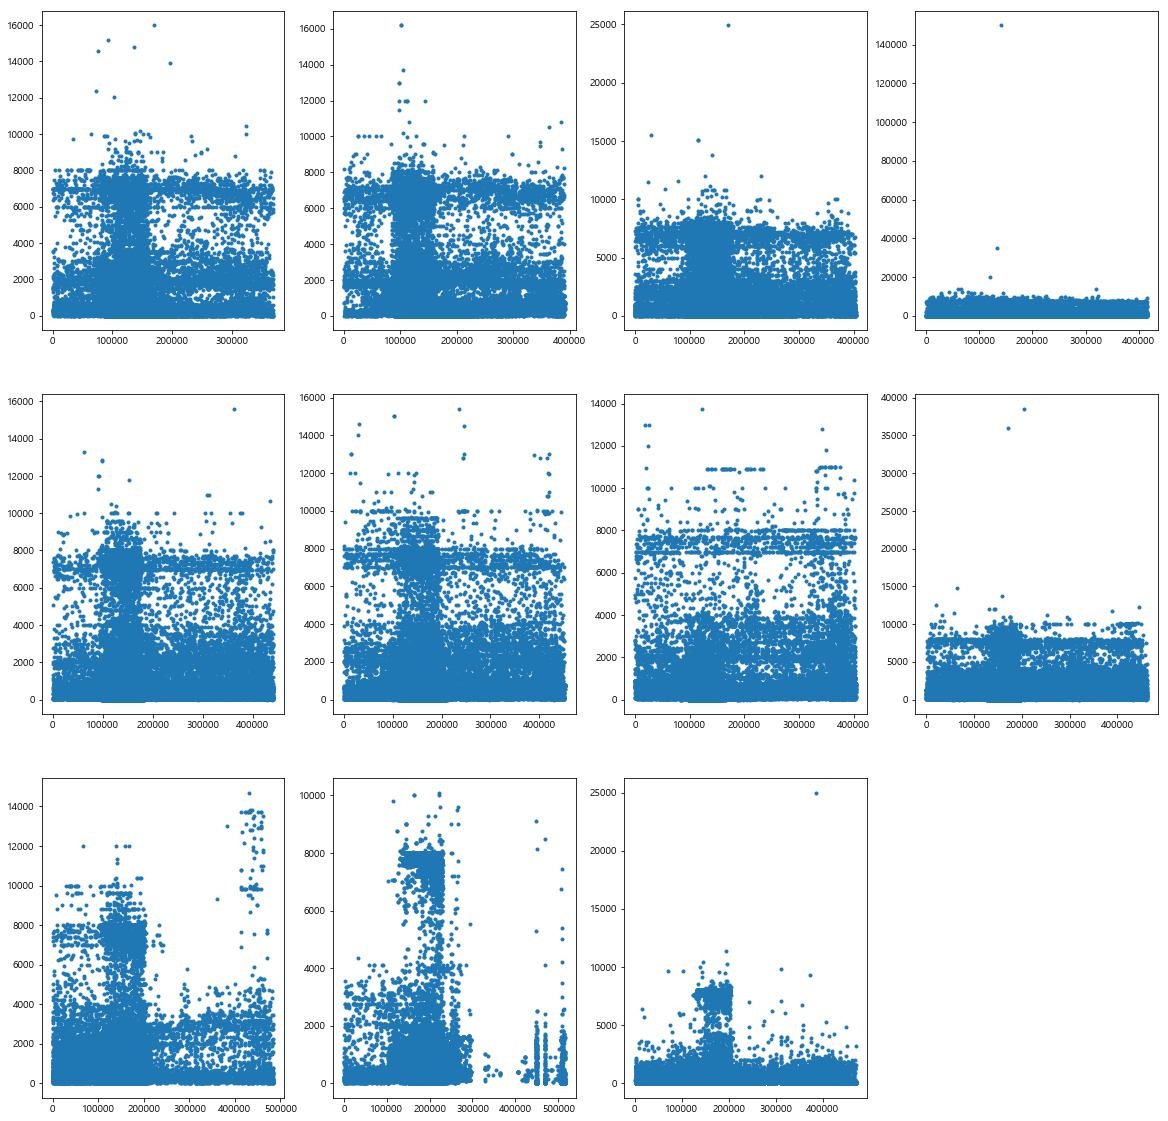

In [11]:
# 100101 봄배추
search(100101)

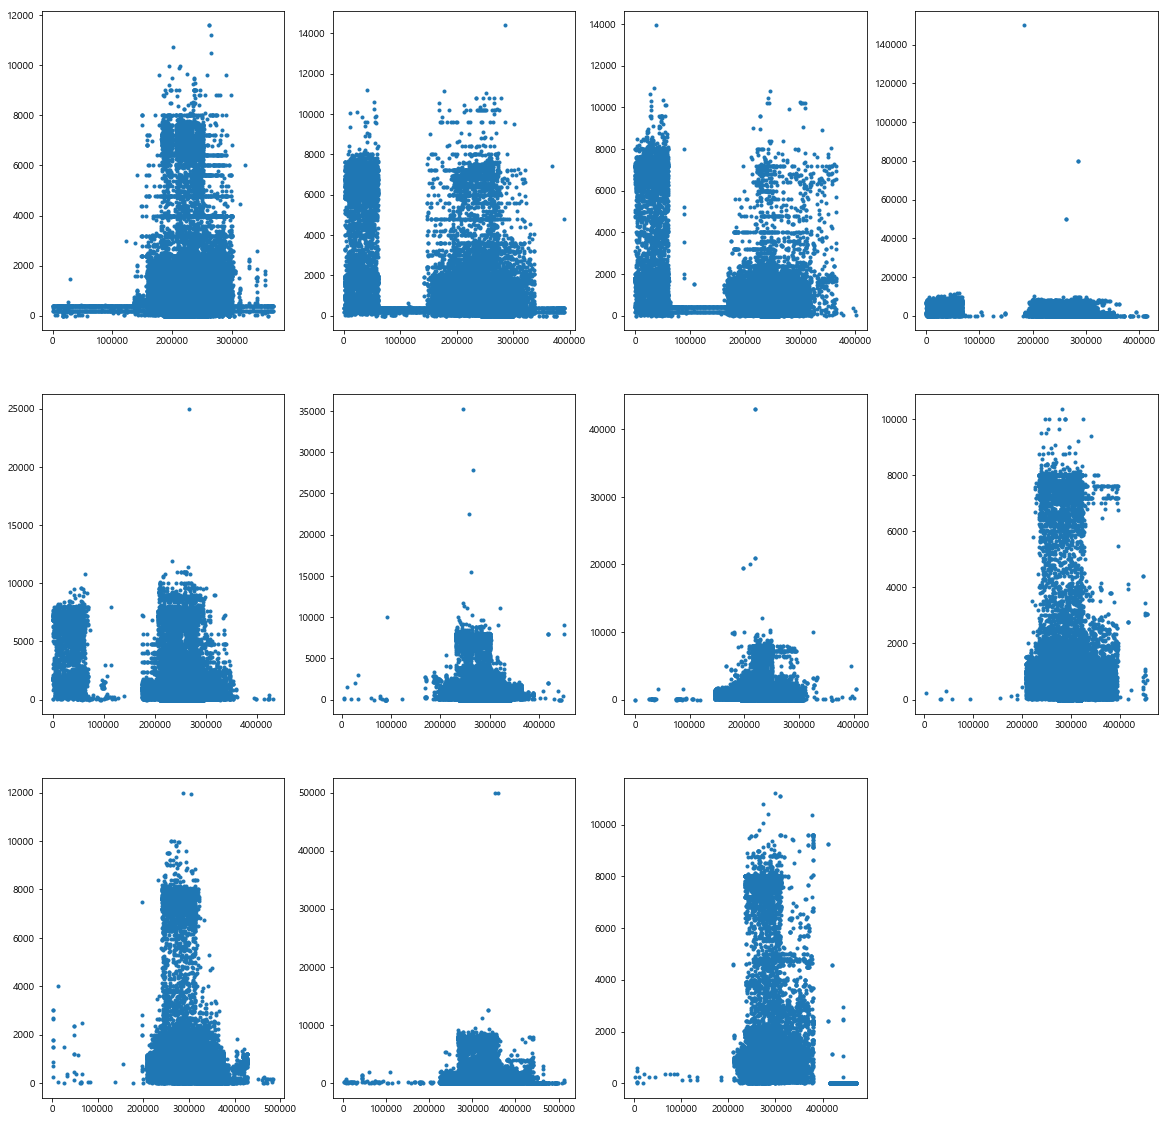

In [12]:
# 100105 고냉지배추
search(100105)

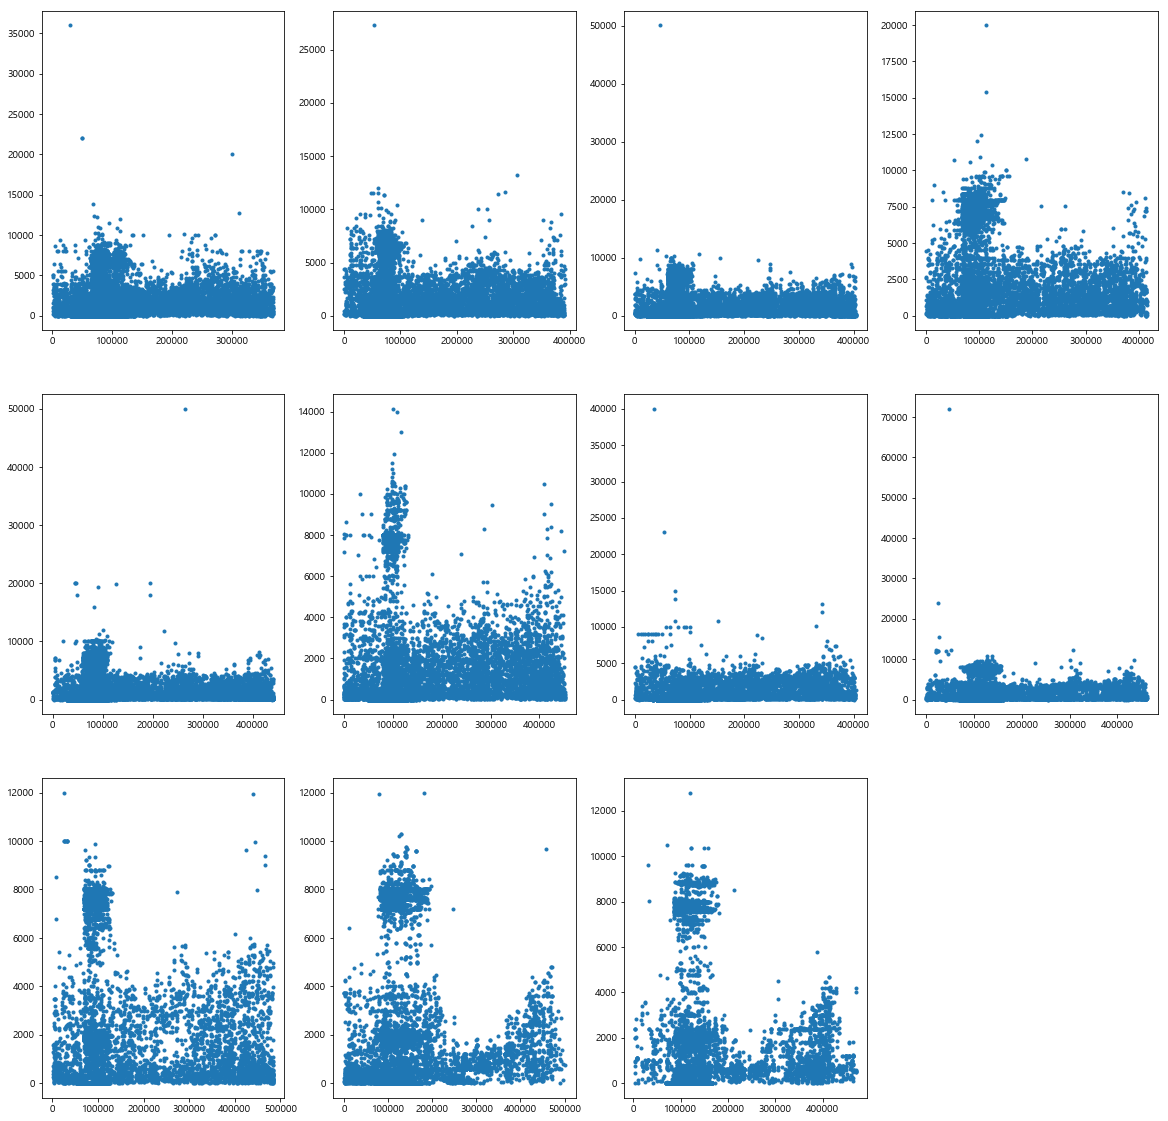

In [13]:
# 100106 저장배추
search(100106)

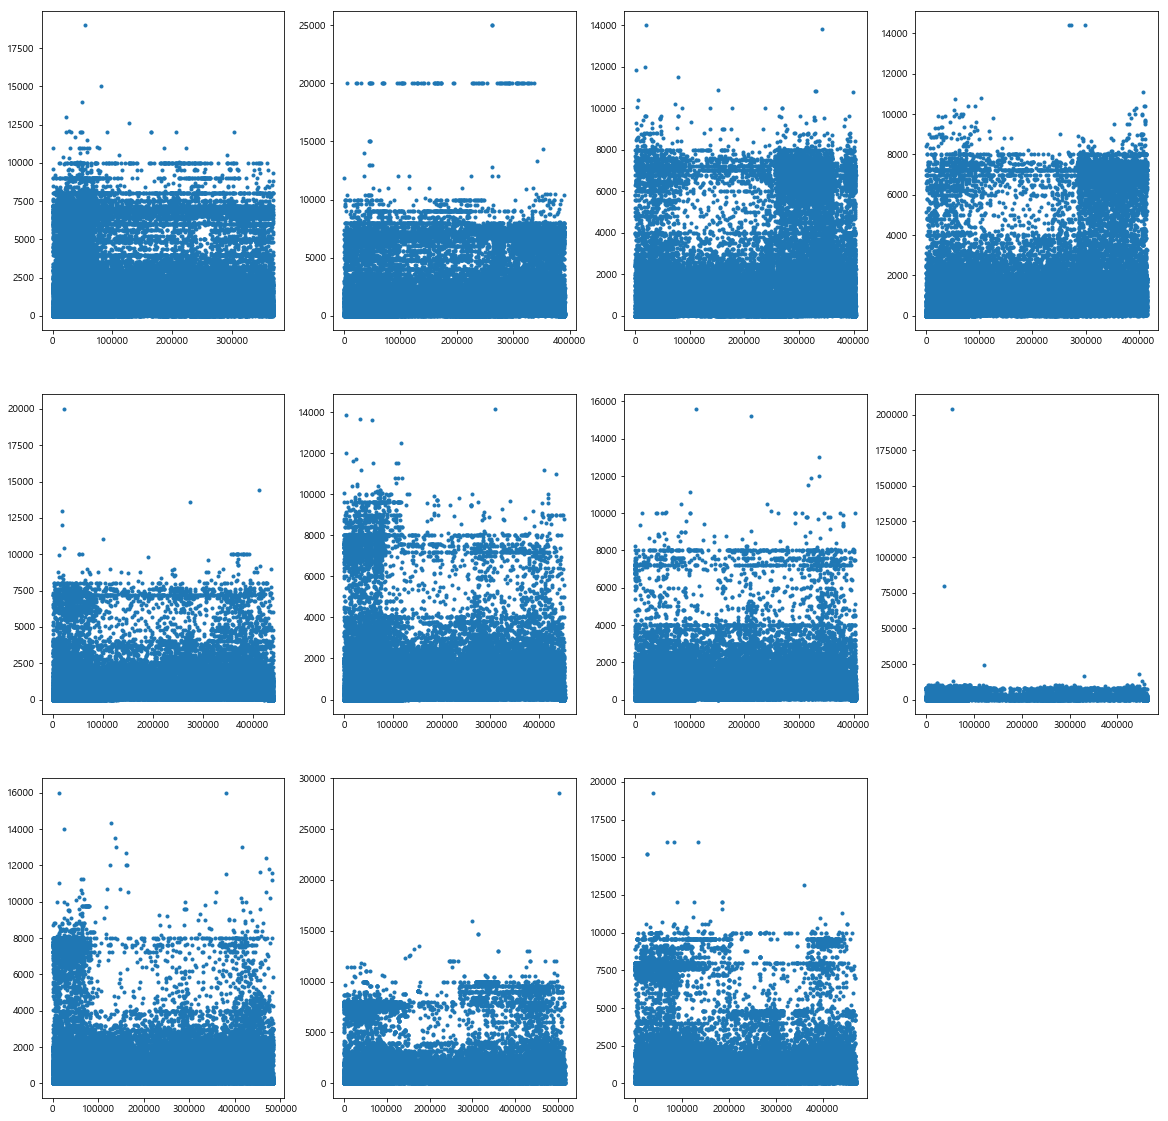

In [14]:
# 100104 월동배추
search(100104)

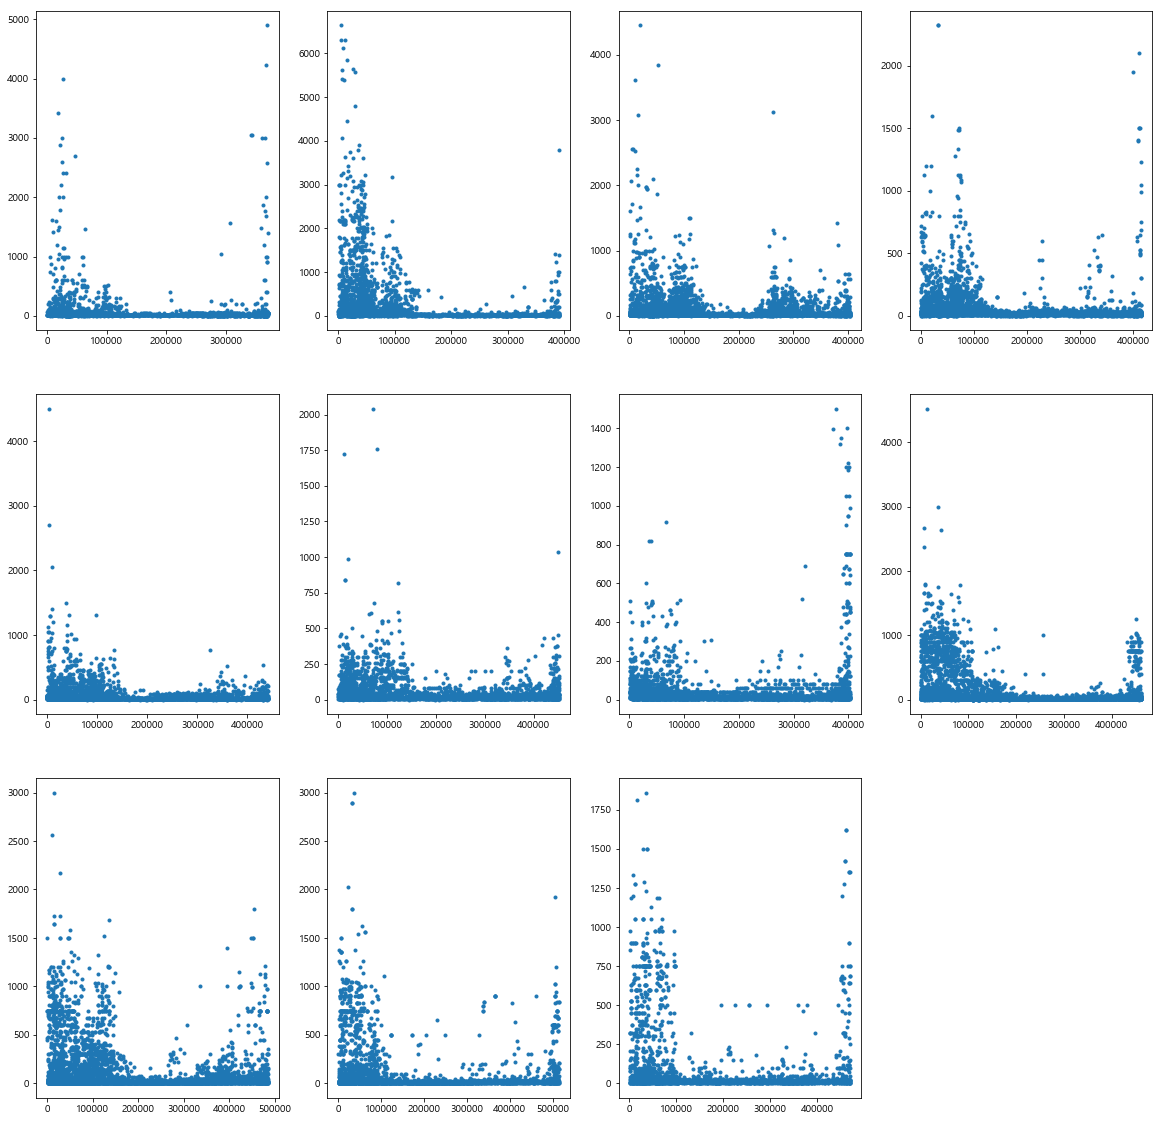

In [15]:
# 100109 우거지
search(100109)

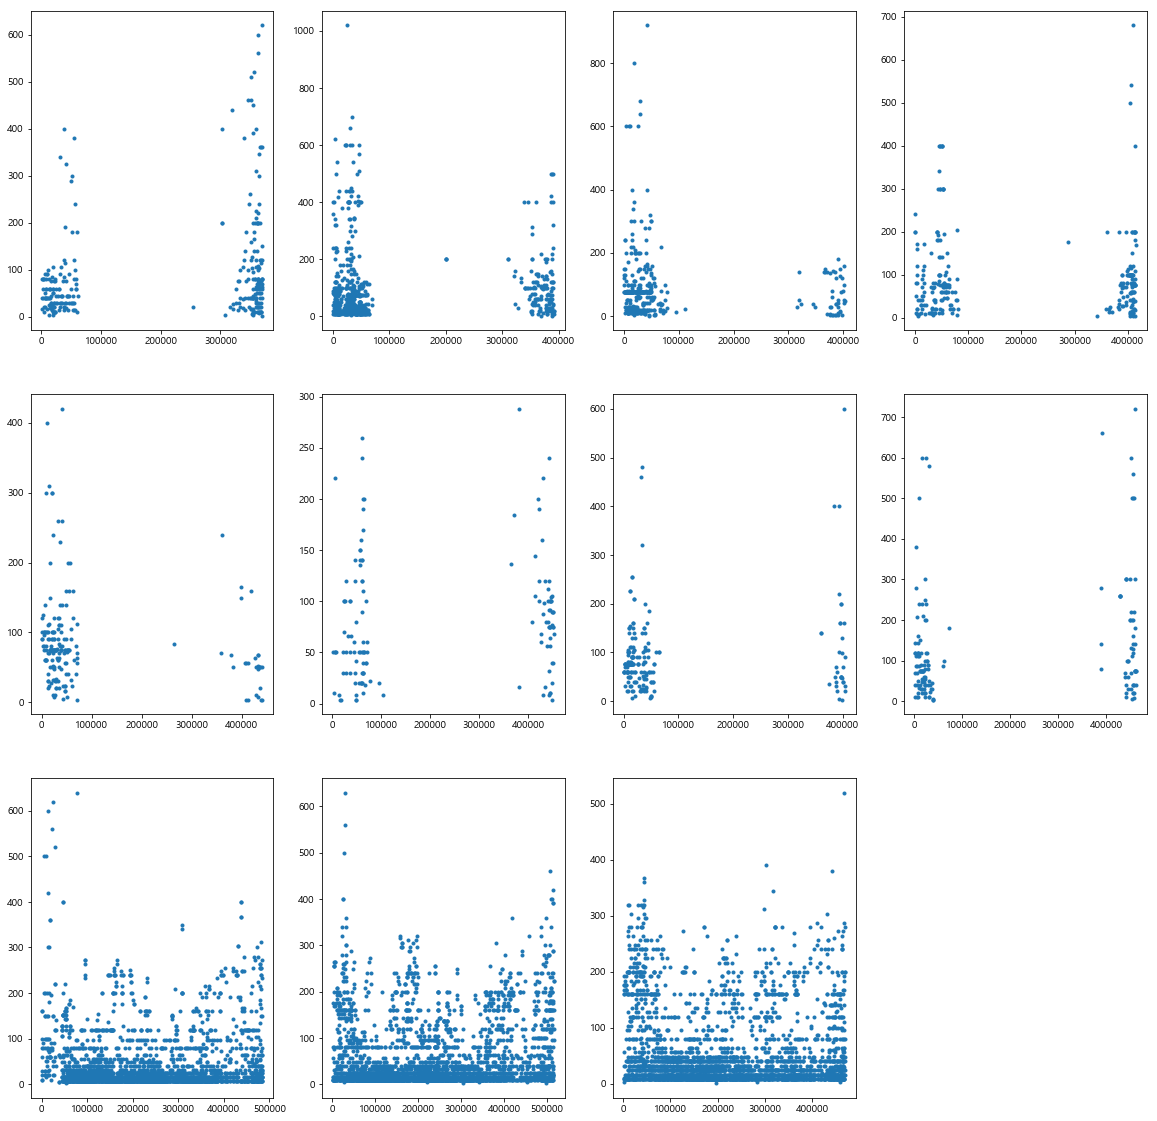

In [16]:
# 100110 배추뿌리
search(100110)

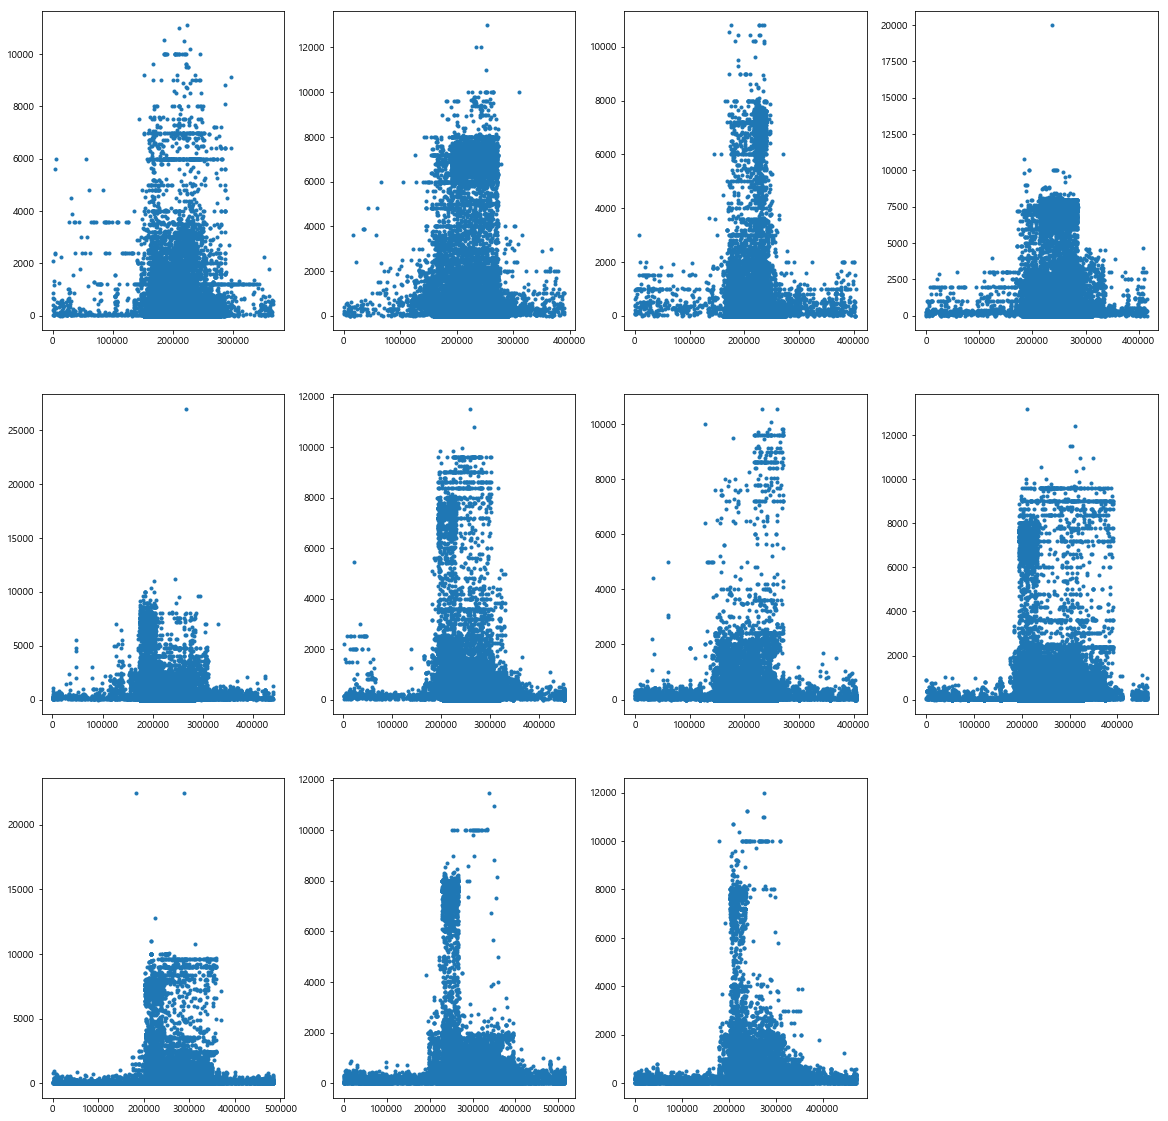

In [17]:
# 100102 여름배추
search(100102)

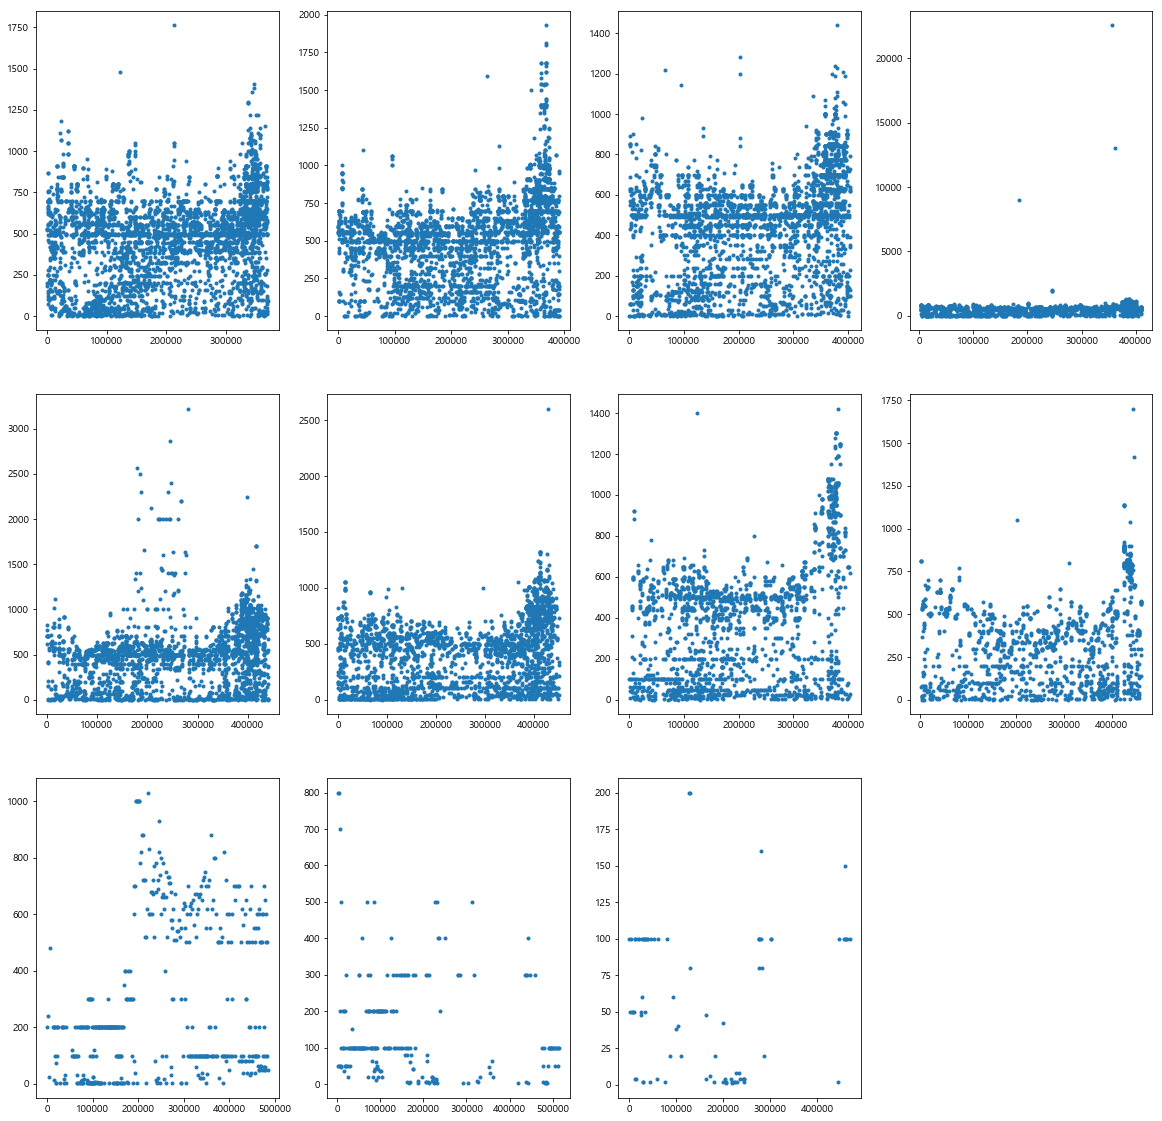

In [18]:
# 100107 생채용배추
search(100107)

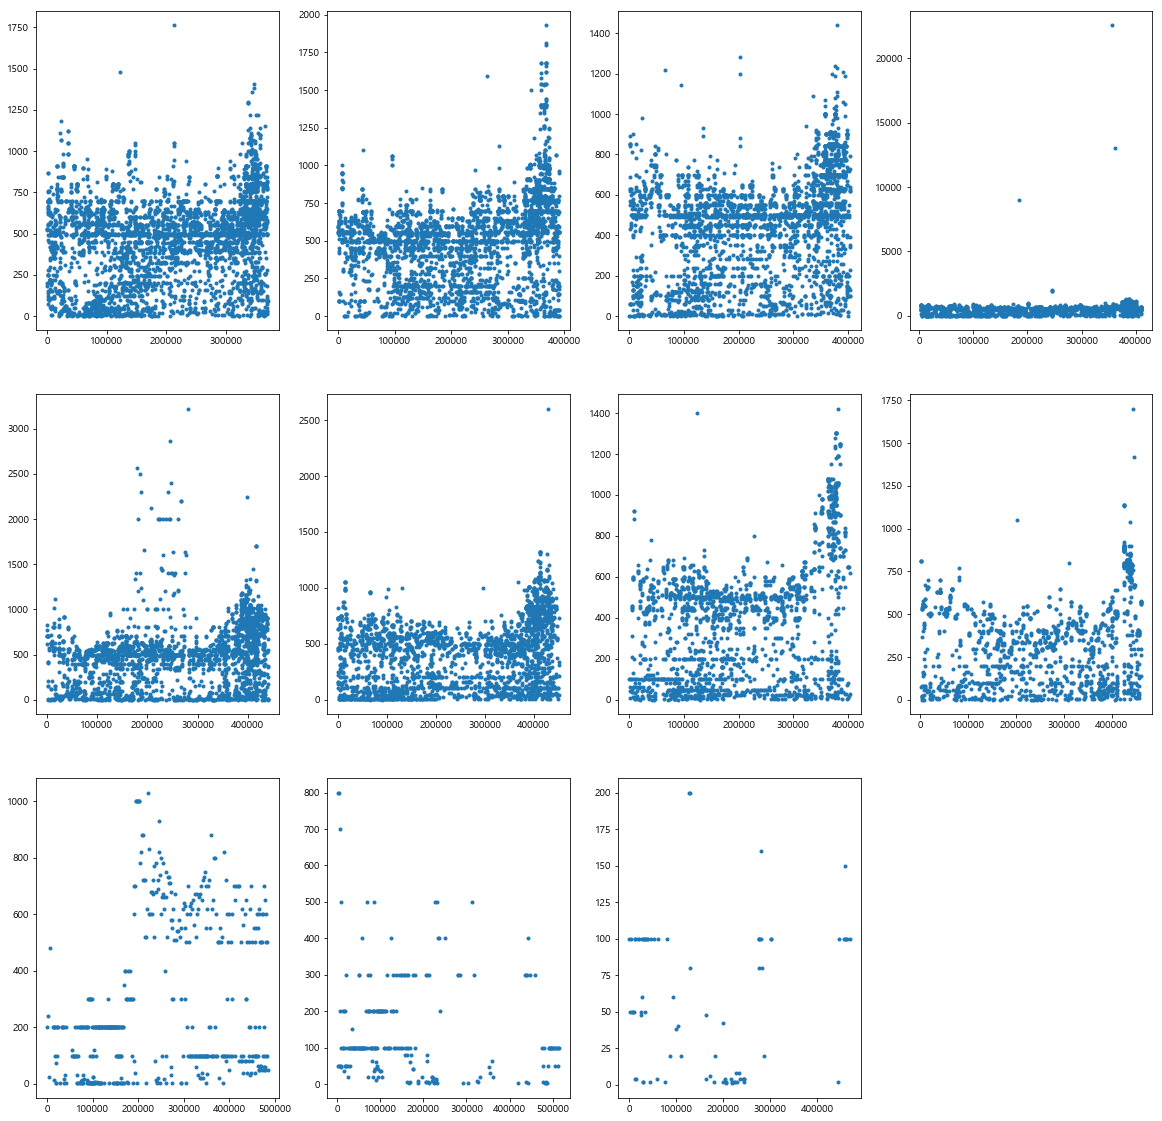

In [19]:
# 100111 절임배추
search(100107)

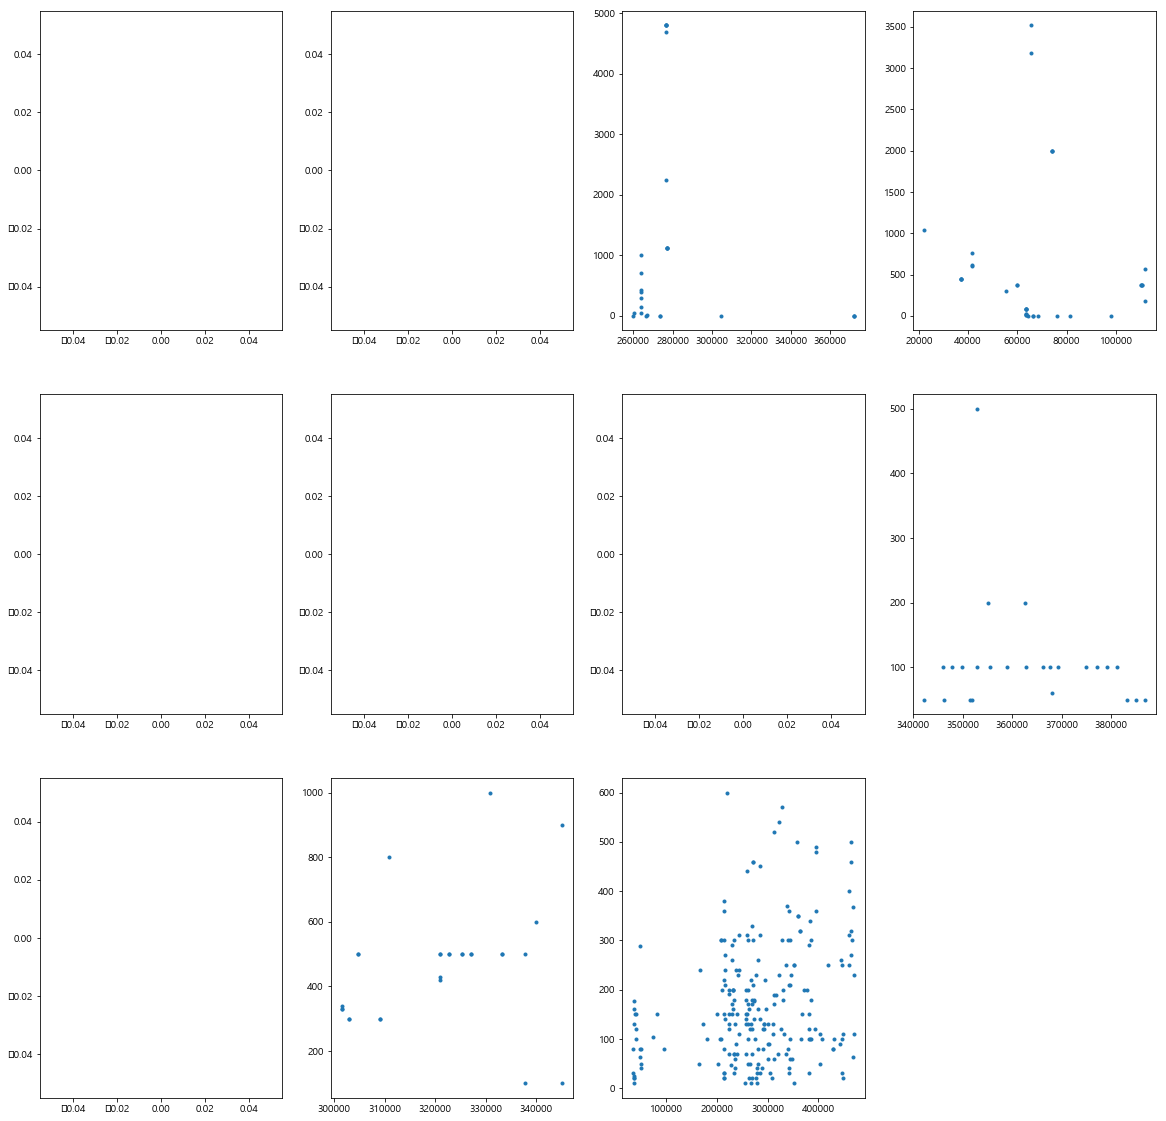

In [20]:
# 100198 배추(수입)
search(100198)

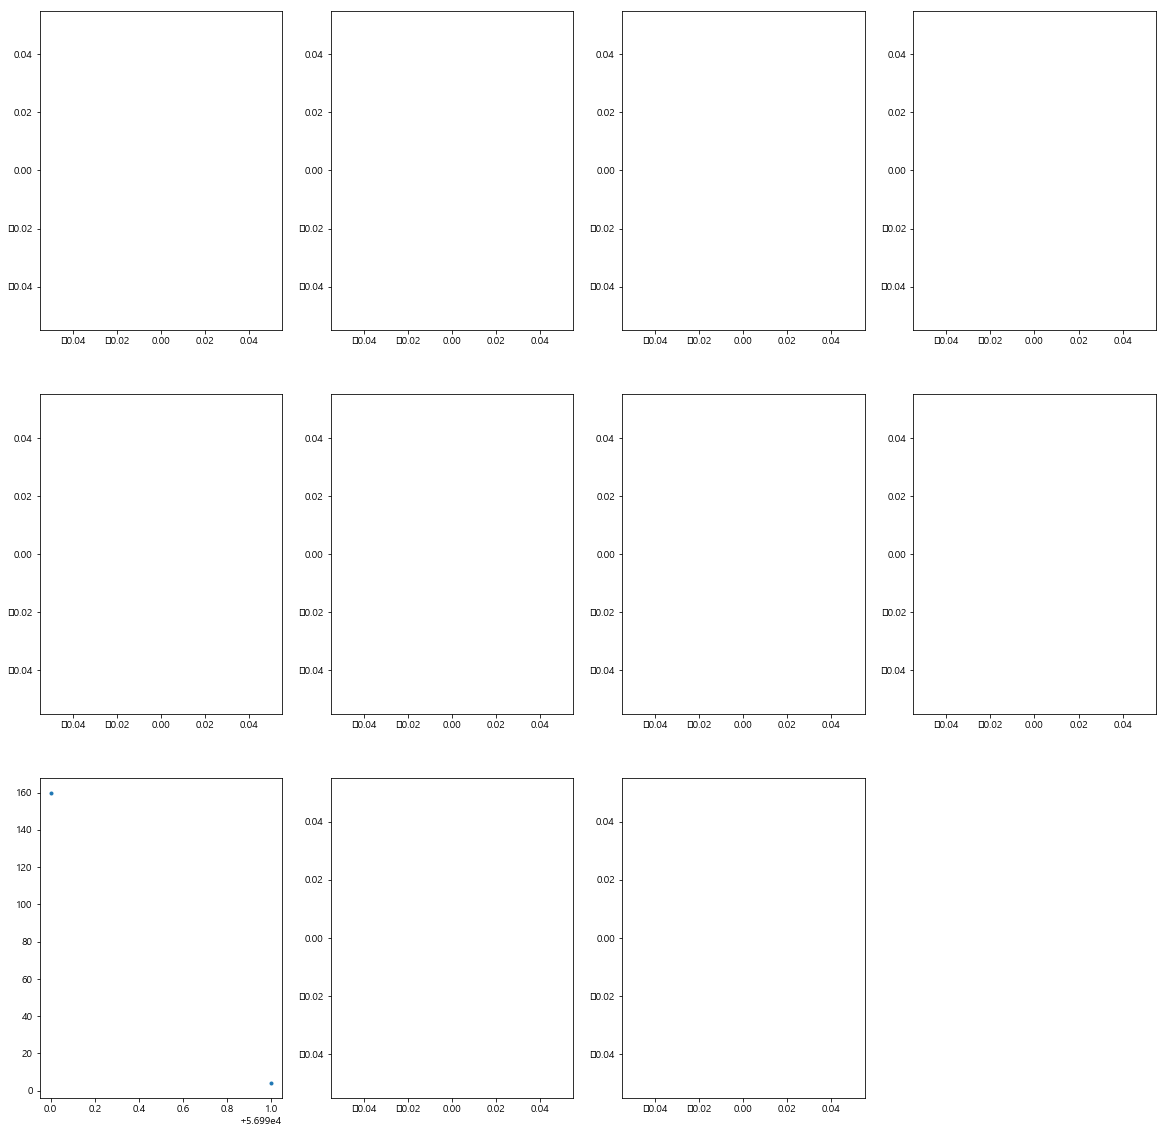

In [21]:
# 100113 배양채
search(100113)

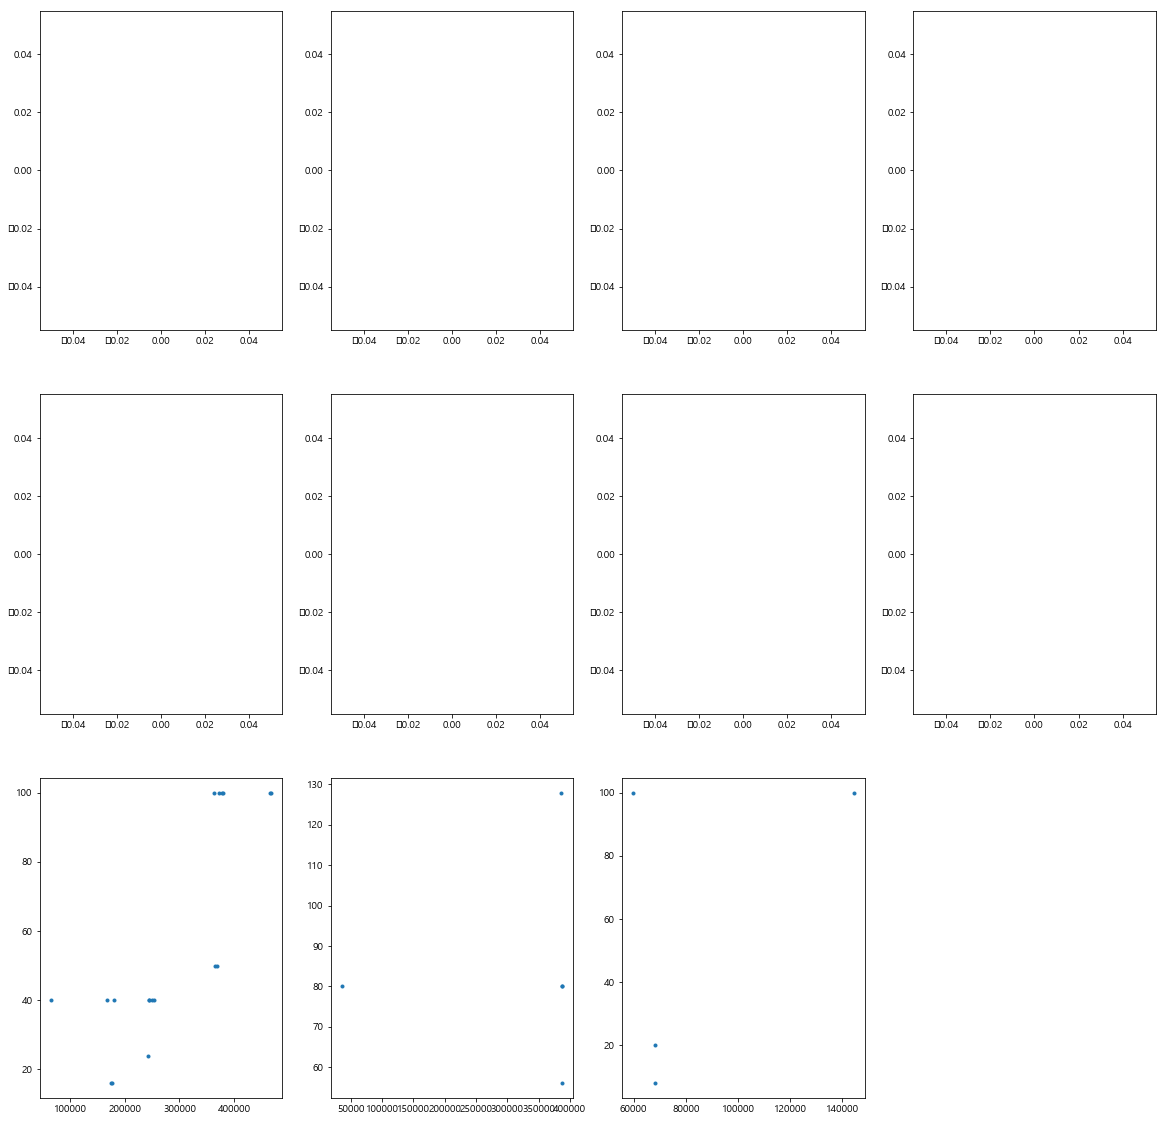

In [22]:
# 100197 우거지(수입)
search(100197)